In [80]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler

cereals = pd.read_csv('C:\\Piazza\\Activity Lab\\Cereals.csv')
cereals.head()

,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


In [81]:
# Setting Label to the data.
cereals['label'] = cereals['name'] + '(' + cereals['shelf'].astype('str') + ' - ' + cereals['rating'].astype('str')+')'
cereals.head()

# Duplicating the label column
label = cereals['label']
cereals.drop(['label'], axis=1, inplace=True)
# Note
# in pandas 1 = columns and 0 = columns
# in numpy  1 = rows and 0 = columns

In [104]:
# Drop the columns
cereals.drop(['name', 'rating', 'shelf'], axis=1, inplace=True)
cereals.head()


ValueError: labels ['name' 'rating' 'shelf'] not contained in axis

In [110]:
cereals.describe()
cereals.isnull().sum()

106.88311688311688

In [84]:
# Impute Missing Values.
mean_imputer = Imputer()
imputed_cereals = mean_imputer.fit_transform(cereals)   # it returns numpy array. need to convert into df.
imputed_cereals = pd.DataFrame(imputed_cereals, columns = cereals.columns)
imputed_cereals.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups
0,70.0,4.0,1.0,130.0,10.0,5.0,6.0,280.000000,25.0,1.0,0.33
1,120.0,3.0,5.0,15.0,2.0,8.0,8.0,135.000000,0.0,1.0,1.00
2,70.0,4.0,1.0,260.0,9.0,7.0,5.0,320.000000,25.0,1.0,0.33
3,50.0,4.0,0.0,140.0,14.0,8.0,0.0,330.000000,25.0,1.0,0.50
4,110.0,2.0,2.0,200.0,1.0,14.0,8.0,98.666667,25.0,1.0,0.75


In [85]:
# Heirarchical Clustering.

In [91]:
my_scaler = StandardScaler()
std_cereals = pd.DataFrame(my_scaler.fit_transform(imputed_cereals), columns=imputed_cereals.columns)
std_cereals.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups
count,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01
mean,-1.258012e-16,5.767392e-17,1.013349e-16,-5.190653e-17,1.463476e-16,-4.527403e-16,-2.144749e-16,-4.758099e-17,5.190653e-17,-1.982541e-16,1.665335e-16
std,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00
min,-2.938605e+00,-1.420902e+00,-1.013072e+00,-1.917189e+00,-9.088244e-01,-2.542013e+00,-1.625929e+00,-1.212115e+00,-1.272550e+00,-3.542628e+00,-2.469891e+00
25%,-3.555846e-01,-5.014948e-01,-1.013072e+00,-3.563056e-01,-4.864980e-01,-7.267769e-01,-9.317120e-01,-7.774919e-01,-1.462701e-01,-1.980675e-01,-6.532825e-01
50%,1.610194e-01,4.179123e-01,-1.298811e-02,2.440343e-01,-6.417167e-02,-4.606439e-16,-6.089621e-03,-1.255577e-01,-1.462701e-01,-1.980675e-01,-3.072619e-01
75%,1.610194e-01,4.179123e-01,9.870962e-01,6.042382e-01,3.581547e-01,5.698204e-01,9.195328e-01,3.090651e-01,-1.462701e-01,-1.980675e-01,7.740527e-01
max,2.744040e+00,3.176134e+00,3.987349e+00,1.924986e+00,5.003745e+00,2.125737e+00,1.845155e+00,3.351425e+00,3.232570e+00,3.146493e+00,2.936682e+00


<IPython.core.display.Javascript object>


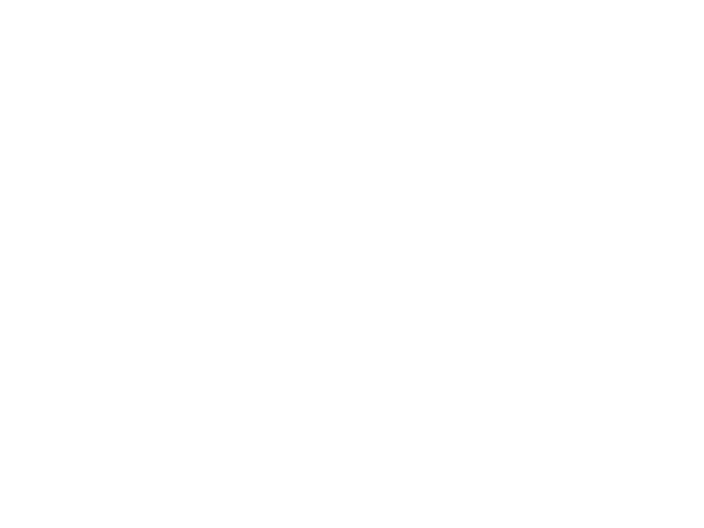

<IPython.core.display.Javascript object>


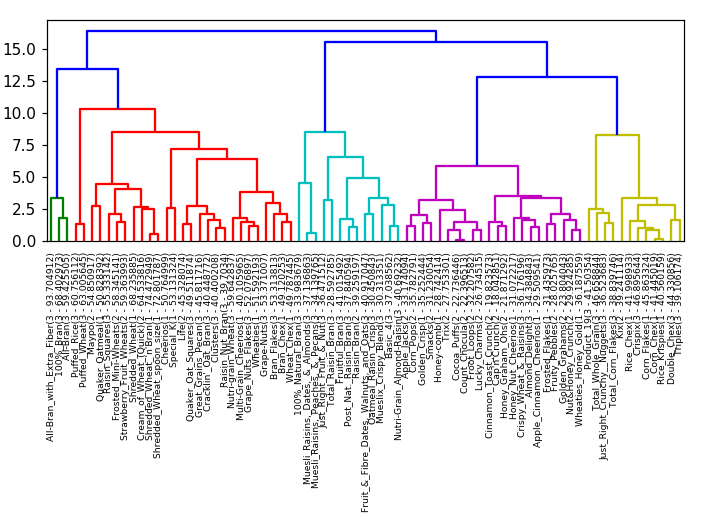

(76, 4)

In [87]:
from scipy.cluster.hierarchy import linkage, dendrogram
linkage_matrix = linkage(std_cereals, method='ward', metric='euclidean')

from matplotlib import pyplot as plt
fig, axs = plt.subplots()
%matplotlib notebook
dendrogram(linkage_matrix, labels = label.as_matrix())
plt.tight_layout()
plt.show()
linkage_matrix.shape

In [88]:
from sklearn.cluster import AgglomerativeClustering
agg_cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
clusters = agg_cluster.fit_predict(std_cereals)
agglomerative_result = pd.DataFrame({"label":label, "agg_cluster":clusters})
agglomerative_result.head(10)

,agg_cluster,label
0,3,100%_Bran(3 - 68.402973)
1,2,100%_Natural_Bran(3 - 33.983679)
2,3,All-Bran(3 - 59.425505)
3,3,All-Bran_with_Extra_Fiber(3 - 93.704912)
4,4,Almond_Delight(3 - 34.384843)
5,4,Apple_Cinnamon_Cheerios(1 - 29.509541)
6,4,Apple_Jacks(2 - 33.174094)
7,2,Basic_4(3 - 37.038562)
8,0,Bran_Chex(1 - 49.120253)
9,0,Bran_Flakes(3 - 53.313813)


In [89]:
# K-Means

In [101]:
from sklearn.cluster import KMeans
kmeans_object = KMeans(n_clusters=5, random_state=5465)
kmeans_object.fit(std_cereals)
kmeans_lables = kmeans_object.predict(std_cereals)

kmeans_clusters = pd.DataFrame({"labe":label, "kmeans_clusters":kmeans_lables})
kmeans_clusters.head(15)

x = pd.DataFrame(my_scaler.inverse_transform(kmeans_object.cluster_centers_))
x.head(10)

# this will return the clusters with mean for each variable.
# here we got 5 clusters.

,0,1,2,3,4,5,6,7,8,9,10
0,110.909091,1.545455,1.045455,170.000000,0.590909,12.500000,11.318182,49.712121,25.000000,1.000000,0.869545
1,89.375000,2.812500,0.375000,59.375000,2.481250,15.487664,3.314145,101.479167,14.062500,0.926875,0.767500
2,63.333333,4.000000,0.666667,176.666667,11.000000,6.666667,3.666667,310.000000,25.000000,1.000000,0.386667
3,126.666667,3.166667,2.055556,156.944444,3.222222,14.111111,9.500000,155.555556,31.944444,1.191667,0.700000
4,105.000000,2.666667,0.555556,236.111111,1.222222,19.055556,3.166667,63.888889,41.666667,1.000000,1.002778
